# Time Series

Pandas comes with an extensive set of tools for working with dates, times, and time-indexed data. Date and time data can be presented in a few different ways:

- _Time stamps_ reference a particular moment in time (e.g., July 4th, 2015 at 7:00am).
- _Time intervals_ and _periods_ reference a length of time between two points in time. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).
- _Time deltas_ or _durations_ reference an exact length of time (e.g., a duration of 22.5 seconds).

Pandas builds upon tools like `datetime`, `dateutil` and `numpy.datetime64` (discussed in more details in the book) to provide a `Timestamp` object, which combines ease-of-use, efficient storage and a vectorized interface. From a group of these objects, Pandas can create a `DatetimeIndex` that can be used to index data in a `Series` or `DataFrame`.

We can parse a flexibly formatted string date, and use standard format codes to output the day of the week:

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [2]:
date.strftime('%A')

'Saturday'

We can also perform NumPy-style vectorized operations directly on this same object:

In [3]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Indexing by Time

Where Pandas time series tools really shines at is when we need to be able to index data by timestamps. Let's see an example of a `Series` object that contains time indexed data:

In [4]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

Now we can use any of the `Series` indexing patterns discussed previously:

In [5]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

There are also some special indexing operations that are exclusive to dates, such as passing a year to obtain a slice of all data from that year:

In [6]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Time Series Data Structures

For each type of time series data, Pandas has an appropriate data structure:

- For *time stamps*, Pandas provides the `Timestamp` type. The associated Index structure is `DatetimeIndex`.
- For *time periods*, Pandas provides the `Period` type. The associated Index structure is `PeriodIndex`.
- For *time deltas*, Pandas provides the `Timedelta` type. The associated Index structure is `TimedeltaIndex`.

The most fundamental of these objects are the `Timestamp` and `DatetimeIndex` objects. They are commonly used through the usage of the `pd.to_datatime()` function, rather than invoked directly. Passing a single date to `pd.to_datetime()` yields a `Timestamp` object, while a series of dates yields by default a `DatetimeIndex`:

In [7]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Any `DatetimeIndex` can be converted to a `PeriodIndex` with the `to_period()` function with the addition of a frequency code. Here we'll use the `'D'` to indicate daily frequency:

In [8]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

A `TimedeltaIndex` can be created when a date is subtracted from another:

In [9]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences with `pd.date_range()`

Pandas offers a few functions for the purpose of conveniently creating regular date sequences: `pd.date_range()` for timestamps, `pd.period_range()` for periods, and `pd.timedelta_range()` for time deltas.

`pd.date_range()` accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates (similar to Python's `range()` and NumPy's `np.arange()`, but for dates). Frequency is one day by default:

In [10]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Alternatively, we can omit the endpoint and instead specify the number of periods:

In [11]:
pd.date_range('2-15-07-03', periods=8)

DatetimeIndex(['2007-02-15 03:00:00', '2007-02-16 03:00:00',
               '2007-02-17 03:00:00', '2007-02-18 03:00:00',
               '2007-02-19 03:00:00', '2007-02-20 03:00:00',
               '2007-02-21 03:00:00', '2007-02-22 03:00:00'],
              dtype='datetime64[ns]', freq='D')

The spacing between items can be modified by altering the `freq` argument, which defaults to `D`. Let's create a range of hourly timestamps for example:

In [12]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

To create regular sequences of `Period` or `Timedelta` values, we can make use of `pd.period_range` and `pd.timedelta_range()`. Here we have some monthly periods:

In [13]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

And a sequence of hourly durations:

In [14]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

More information about these frequency codes can be found at Pandas official documentation.

## Resampling, Shifting and Windowing

On top of the benefits of indexed data in general, Pandas also provides several additional operations specific to time series. We'll take a look at a few of those here.

For that, we'll be using Google's closing price history, loaded from Yahoo Finance.

In [22]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


For the sake of simplicity, we will use just the closing price:

In [16]:
goog = goog['Close']

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

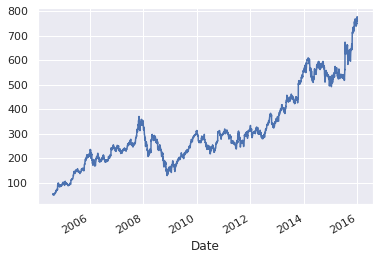

In [18]:
goog.plot();

### Resampling and converting frequencies

The need to resample time series data at higher or lower frequencies is pretty common.  This can be done using either the `resample()` or `asfreq()`. The main difference between the two is that `resample()` is fundamentally a *data aggregation*, while `asfreq()` is fundamentally a *data selection*.

Lets compare what the two return when we down sample the data at the end of business year:

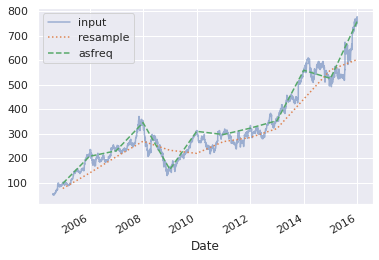

In [19]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

We can see that, at each point, `resample()` reports the *average of the previous year*, while `asfreq()` reports the *value at the end of the year*.

For up-sampling, both methods are largely equivalent, though `resample()` has many more options available. In this case, the default for both methods is to leave the up-sampled points empty (filled with NA values).

Here we'll resample the business day data at a daily frequency:

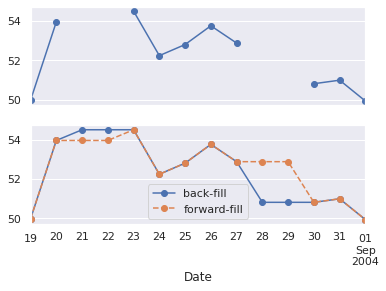

In [20]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

The top panel is the default: non-business days are left as NA values. The bottom panel shows the differences between two strategies for filling the gaps: forward-filling and backward-filling.

### Time-shifts

Another common operation that is specific to time series is shifting of data in time. Pandas has two methods for computing this: `shift()` and `tshift()`. The difference between them is that `shift()` *shifts the data*, while `tshift()` *shifts the index*. In both cases, the shift is specified in multiples of the frequency.

Here we will both `shift()` and `tshift()` by 900 days:

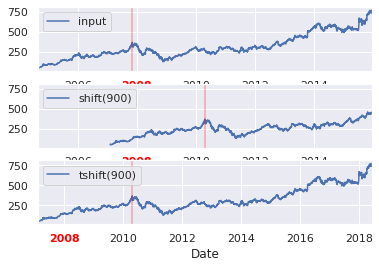

In [21]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

We can see the difference pretty clearly: `shift(900)` shifts the *data* by 900 days pushing some of it off the graph (and leaving NA values at the other end), while `tshift(900)` shifts the *index values* by 900 days.

The book goes over a short example on rolling statics [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html#Rolling-windows), as well as a more involved example using real-world data [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html#Example:-Visualizing-Seattle-Bicycle-Counts), that are definitely worth checking out.